<a href="https://colab.research.google.com/github/abdyraman/hr-deep-learning/blob/main/deep_hr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Employee retention strategies are integral to the success and well-being of a company. There are often many reasons why employees leave an organization, and in this case study, I will explore some of the key drivers of employee attrition. Employee attrition measures how many workers have left an organization and is a common metric companies use to assess their performance. While turnover rates vary from industry to industry, the [Bureau of Labor Statistics reported](https://www.bls.gov/news.release/jolts.t18.htm#) that among voluntary separations the overall turnover rate was 25% in 2020.


In this notebook, I will explore [IBM's dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset) on HR Analytics. The data consists of nearly 1,500 current and former employees with information related to their job satisfaction, work life balance, tenure, experience, salary, and demographic data. Below is a brief overview and summary statistics of the data.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import metrics
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import iplot
from warnings import filterwarnings
import sklearn as skl
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
import plotly.express as px
from statistics import stdev
import plotly.figure_factory as ff

In [74]:
df_full = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [75]:
# There are 1,470 rows and 35 columns in the data
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [76]:
#check for NaN values
df_full.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [77]:
have_duplicate_rows = df_full.duplicated().any()
have_duplicate_rows

False

**Data cleaning**

There is no missing value and duplicate rows in dataset. Some of columns can be removed, because their values do not affect the analysis results:

Over18: All values are Y

EmployeeCount: all values are 1.0

StandardHours: all values are 80.0

EmployeeNumber: is the id of the employee that their values do not affect the analysis results.

In [79]:
# remove 4 columns
df = df_full.drop(['Over18', 'EmployeeNumber','EmployeeCount','StandardHours'],axis=1)





Text data analysis- categorical values

In [81]:
unique_counts_objects = df.select_dtypes('object').nunique()
unique_counts_objects

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

In [82]:
# Loop through each categorical variable and print its unique values
for i in unique_counts_objects.index:
    print('Unique values of', i, set(df[i]))

Unique values of Attrition {'Yes', 'No'}
Unique values of BusinessTravel {'Travel_Frequently', 'Non-Travel', 'Travel_Rarely'}
Unique values of Department {'Sales', 'Research & Development', 'Human Resources'}
Unique values of EducationField {'Technical Degree', 'Medical', 'Life Sciences', 'Other', 'Marketing', 'Human Resources'}
Unique values of Gender {'Female', 'Male'}
Unique values of JobRole {'Sales Representative', 'Manufacturing Director', 'Manager', 'Research Scientist', 'Laboratory Technician', 'Sales Executive', 'Healthcare Representative', 'Research Director', 'Human Resources'}
Unique values of MaritalStatus {'Married', 'Single', 'Divorced'}
Unique values of OverTime {'Yes', 'No'}


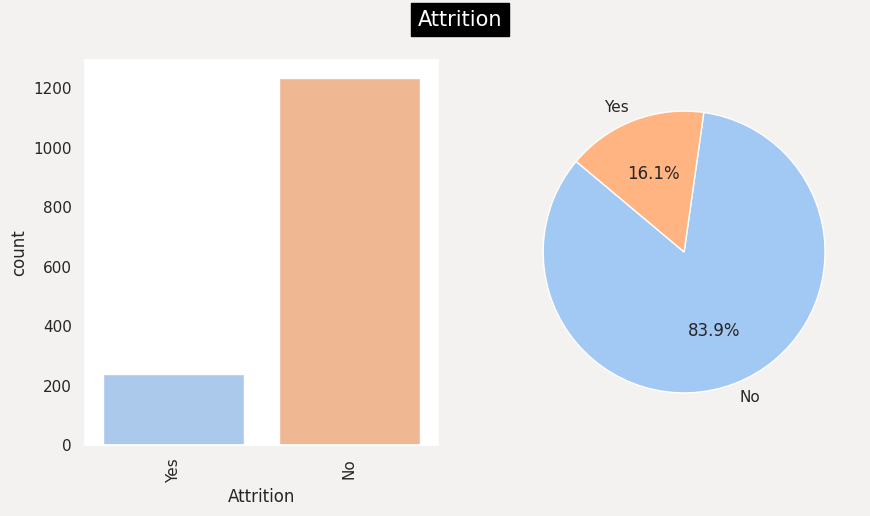

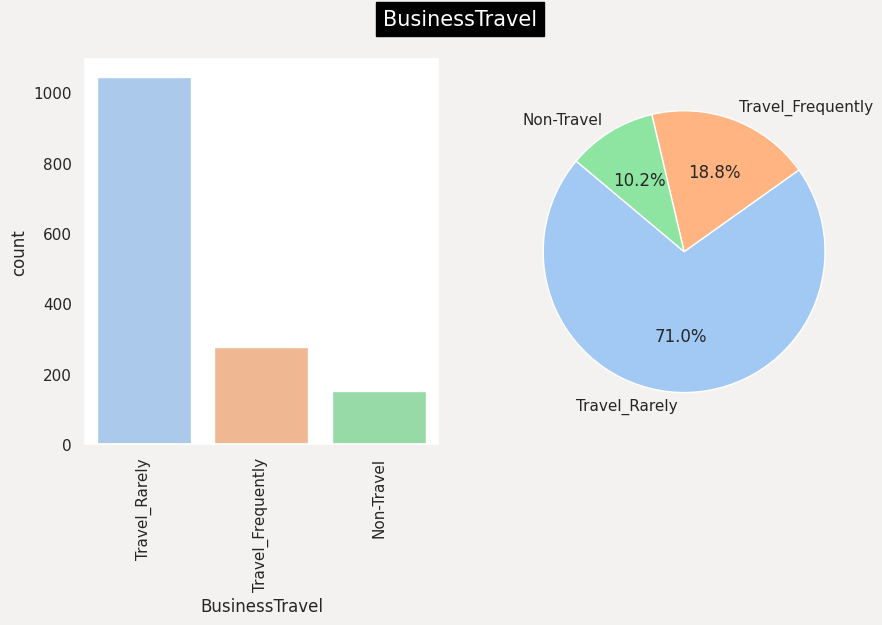

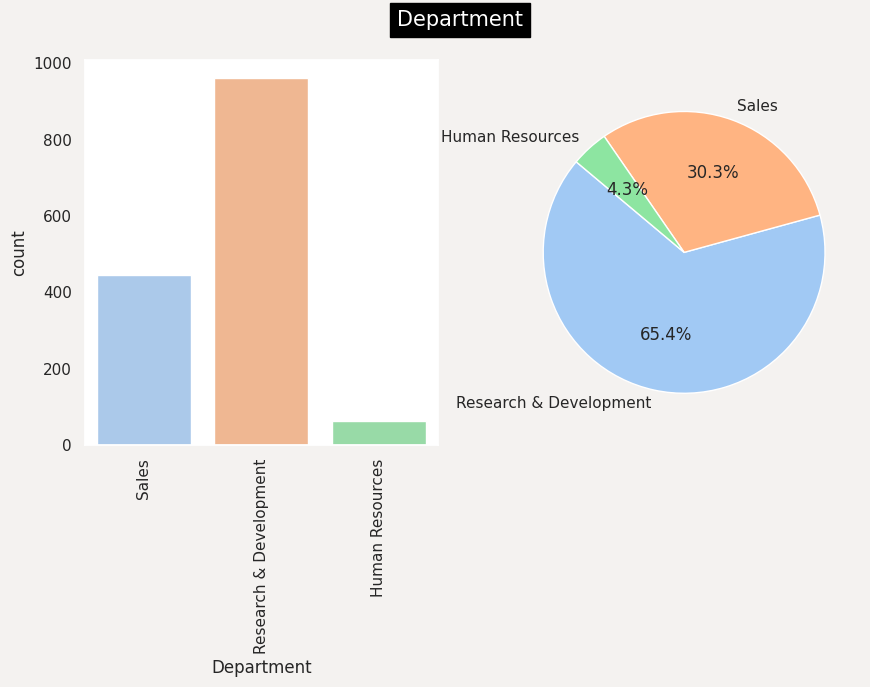

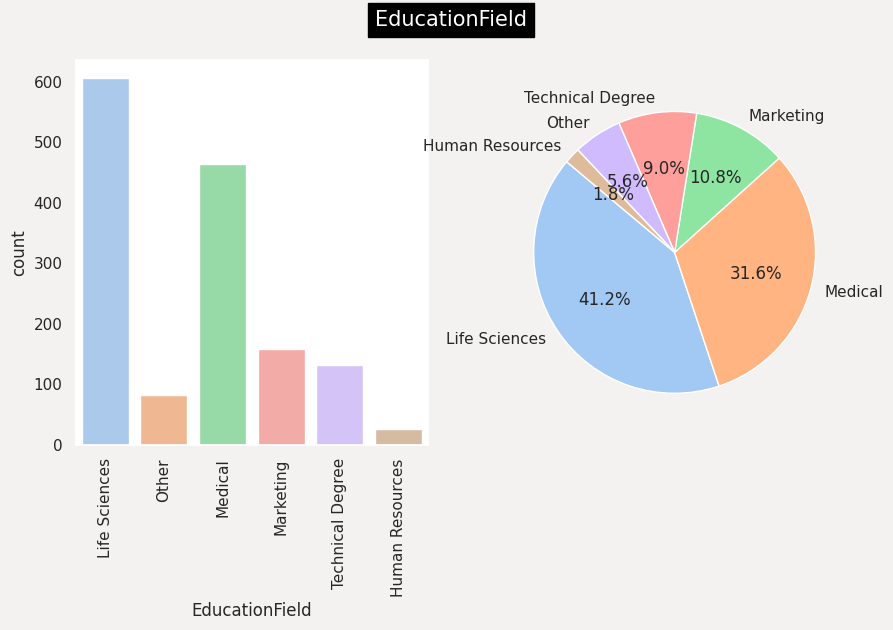

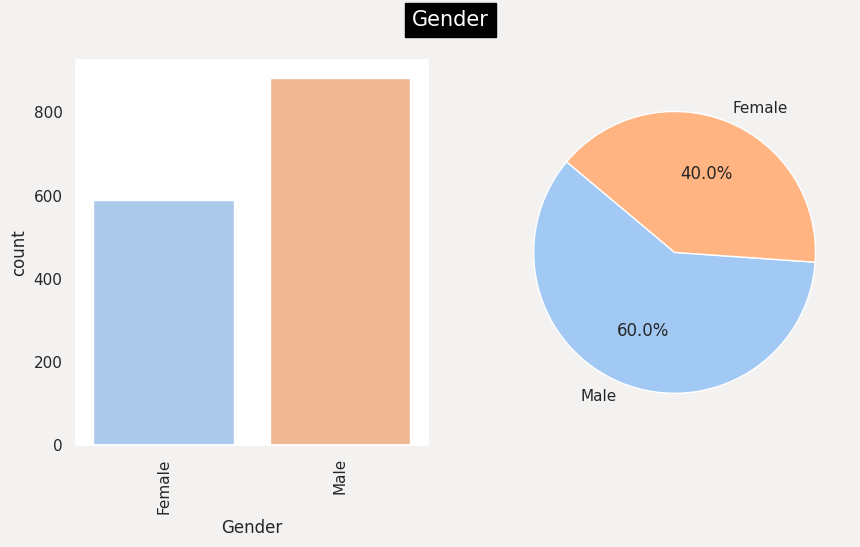

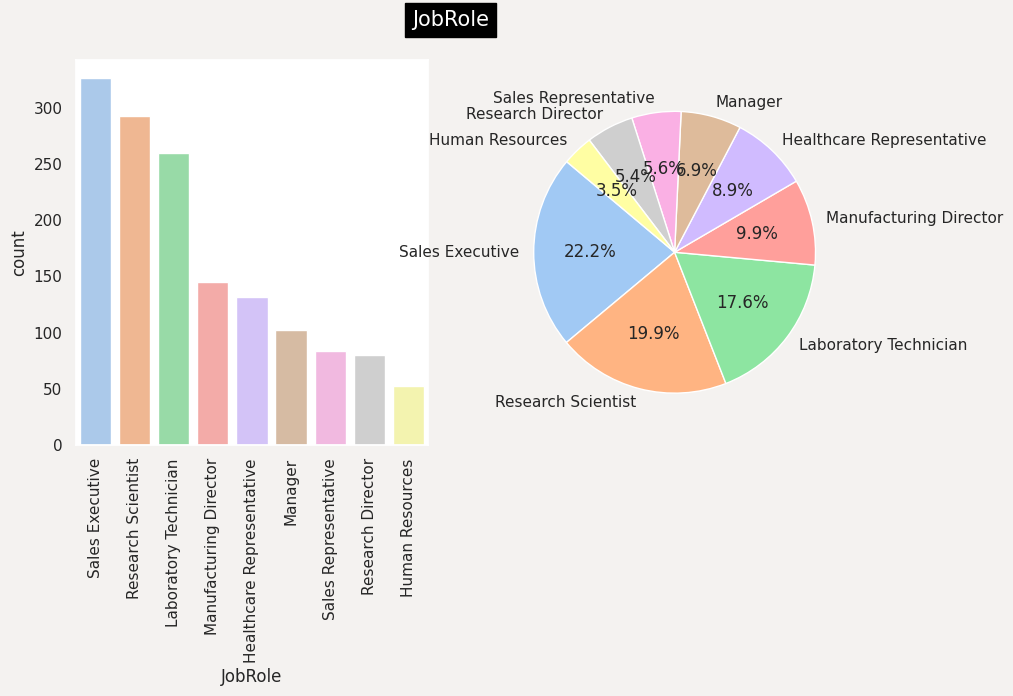

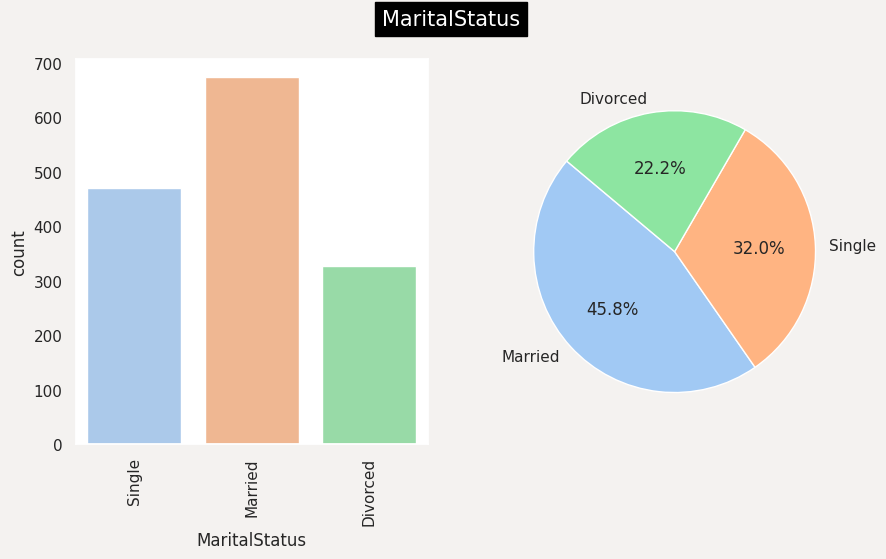

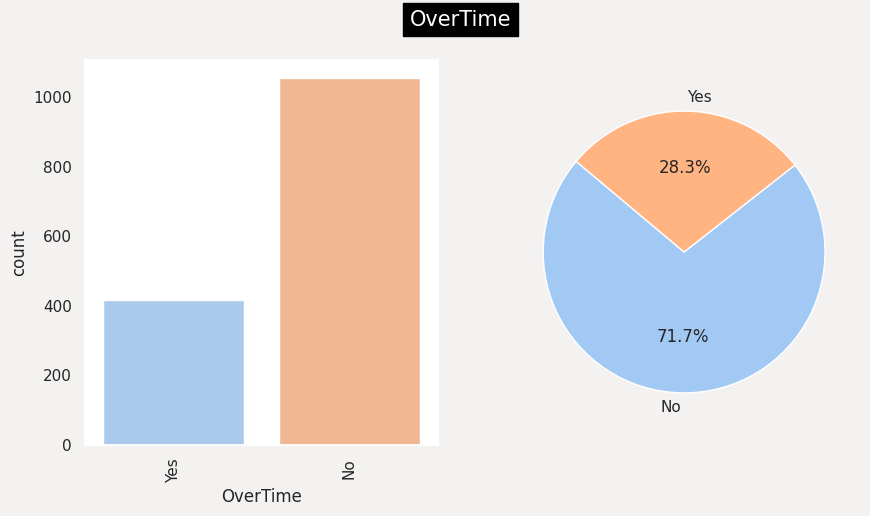

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming unique_counts_objects is a Series containing the number of unique values for each categorical variable

sns.set(rc={"axes.facecolor": "white", "figure.facecolor": '#F4F2F0'})
sns.set_palette("pastel")

# Loop through each categorical variable and create countplot and pie chart
for col in unique_counts_objects.index:

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    # Countplot
    ax1 = sns.countplot(data=df, x=col, ax=axes[0])
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

    # Pie chart
    count_values = df[col].value_counts()
    ax2 = axes[1]
    ax2.pie(count_values, labels=count_values.index, autopct='%1.1f%%', startangle=140)
    ax2.set_aspect("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.suptitle(col, backgroundcolor='black', color='white', fontsize=15)
    plt.show()


Numeric Data Analysis

In [84]:
num=df.select_dtypes('int64')
num.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


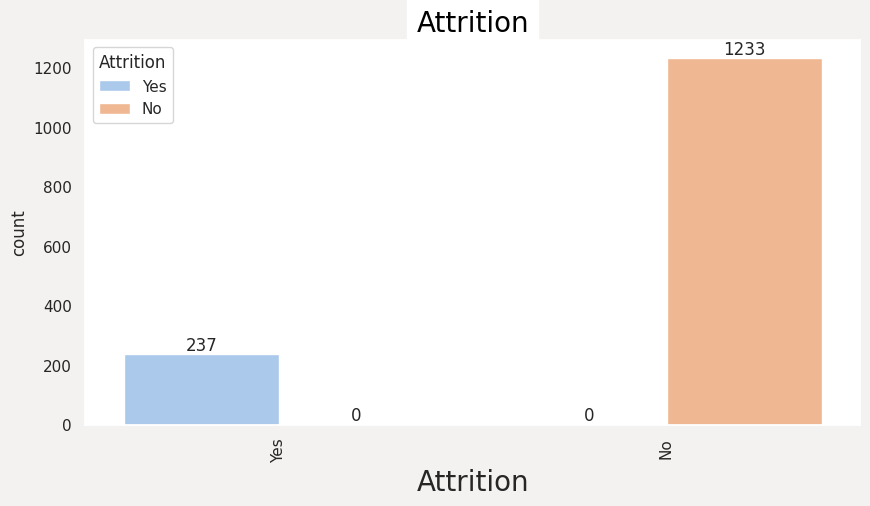

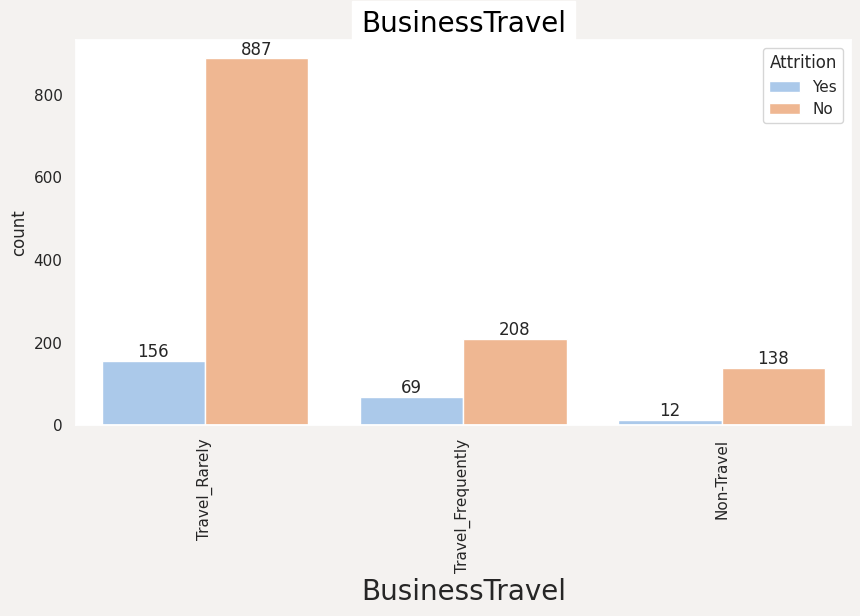

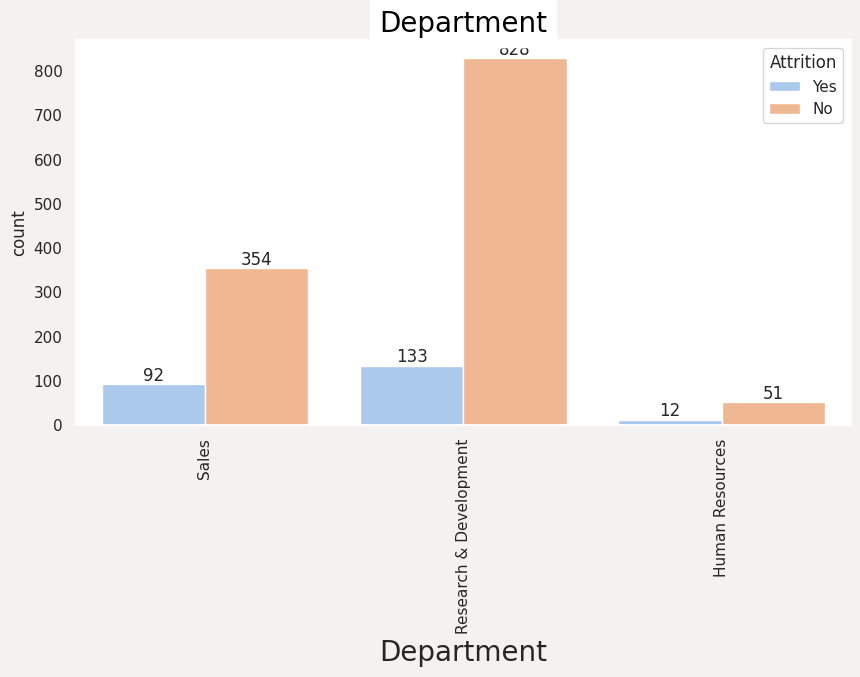

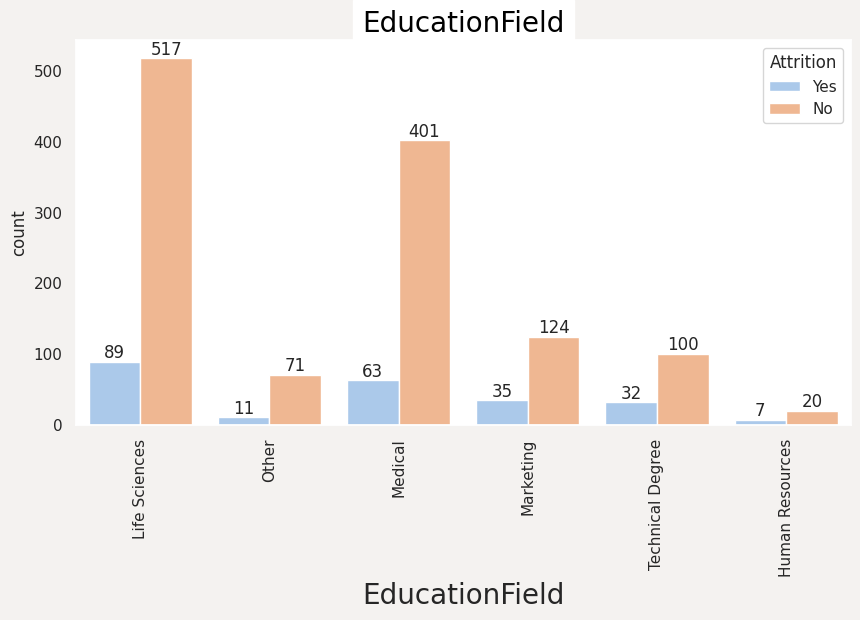

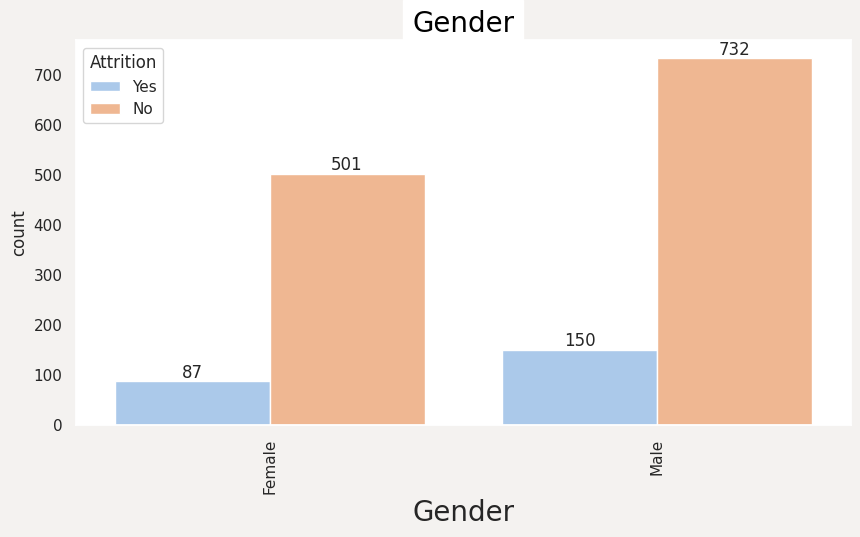

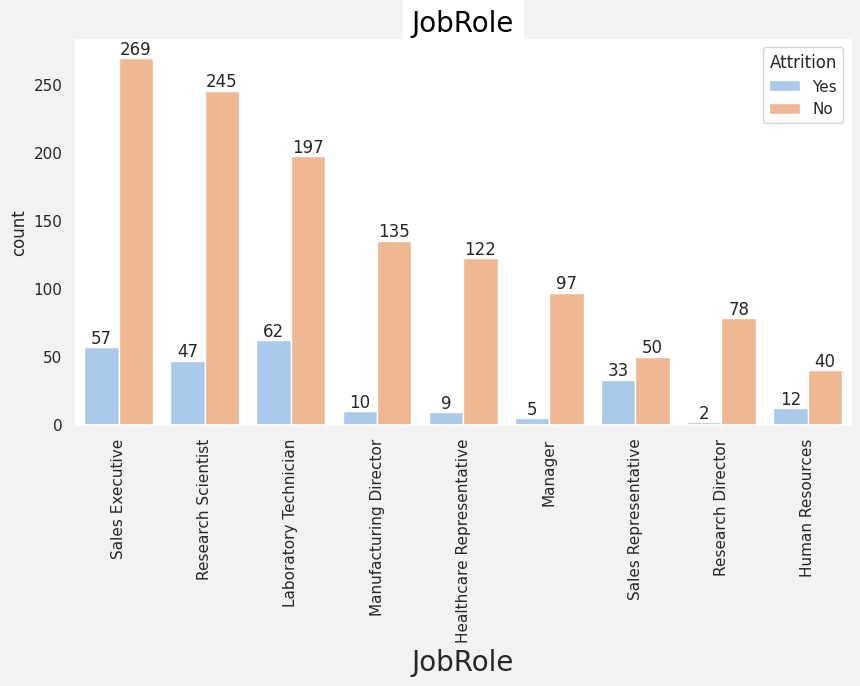

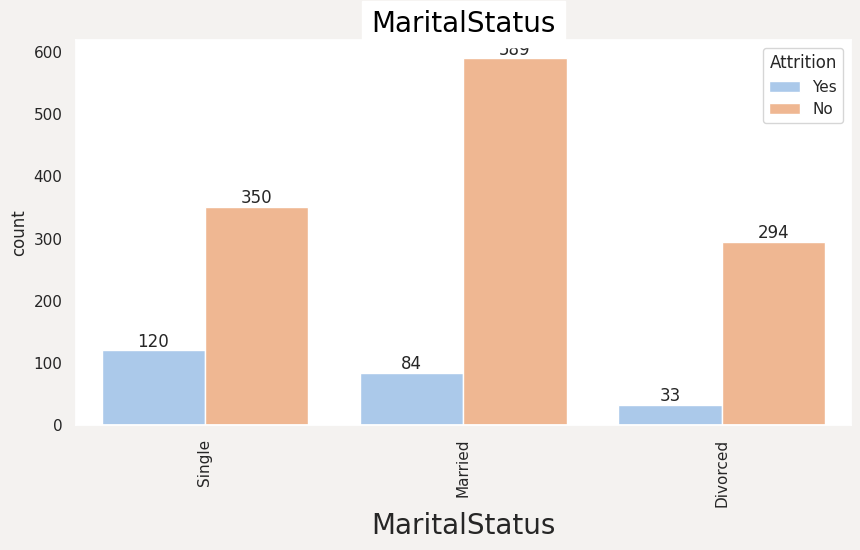

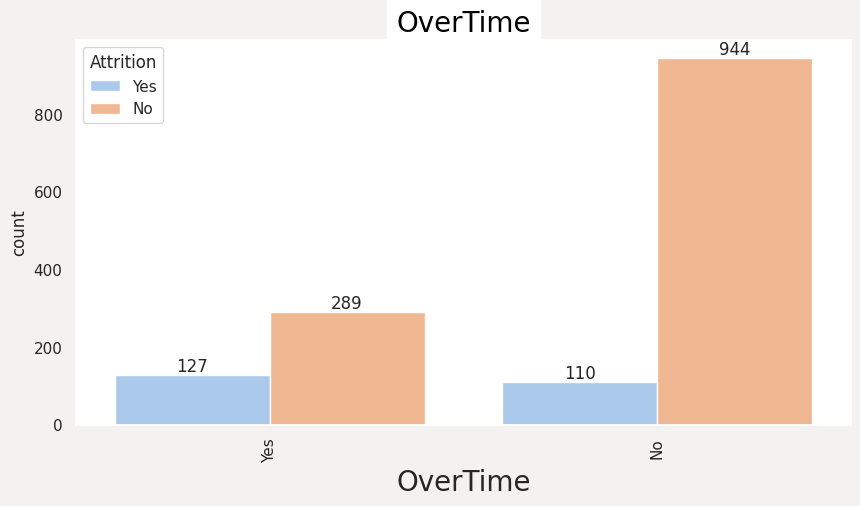

In [85]:
for column in unique_counts_objects.index:
    plt.figure(figsize=(10,5))

    ax=sns.countplot(x=df[column], data=df,hue="Attrition")
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(column,backgroundcolor='white',color='black',fontsize=20)
    plt.xticks(rotation=90)
    plt.xlabel(column,fontsize=20)
    plt.grid()
    plt.show()

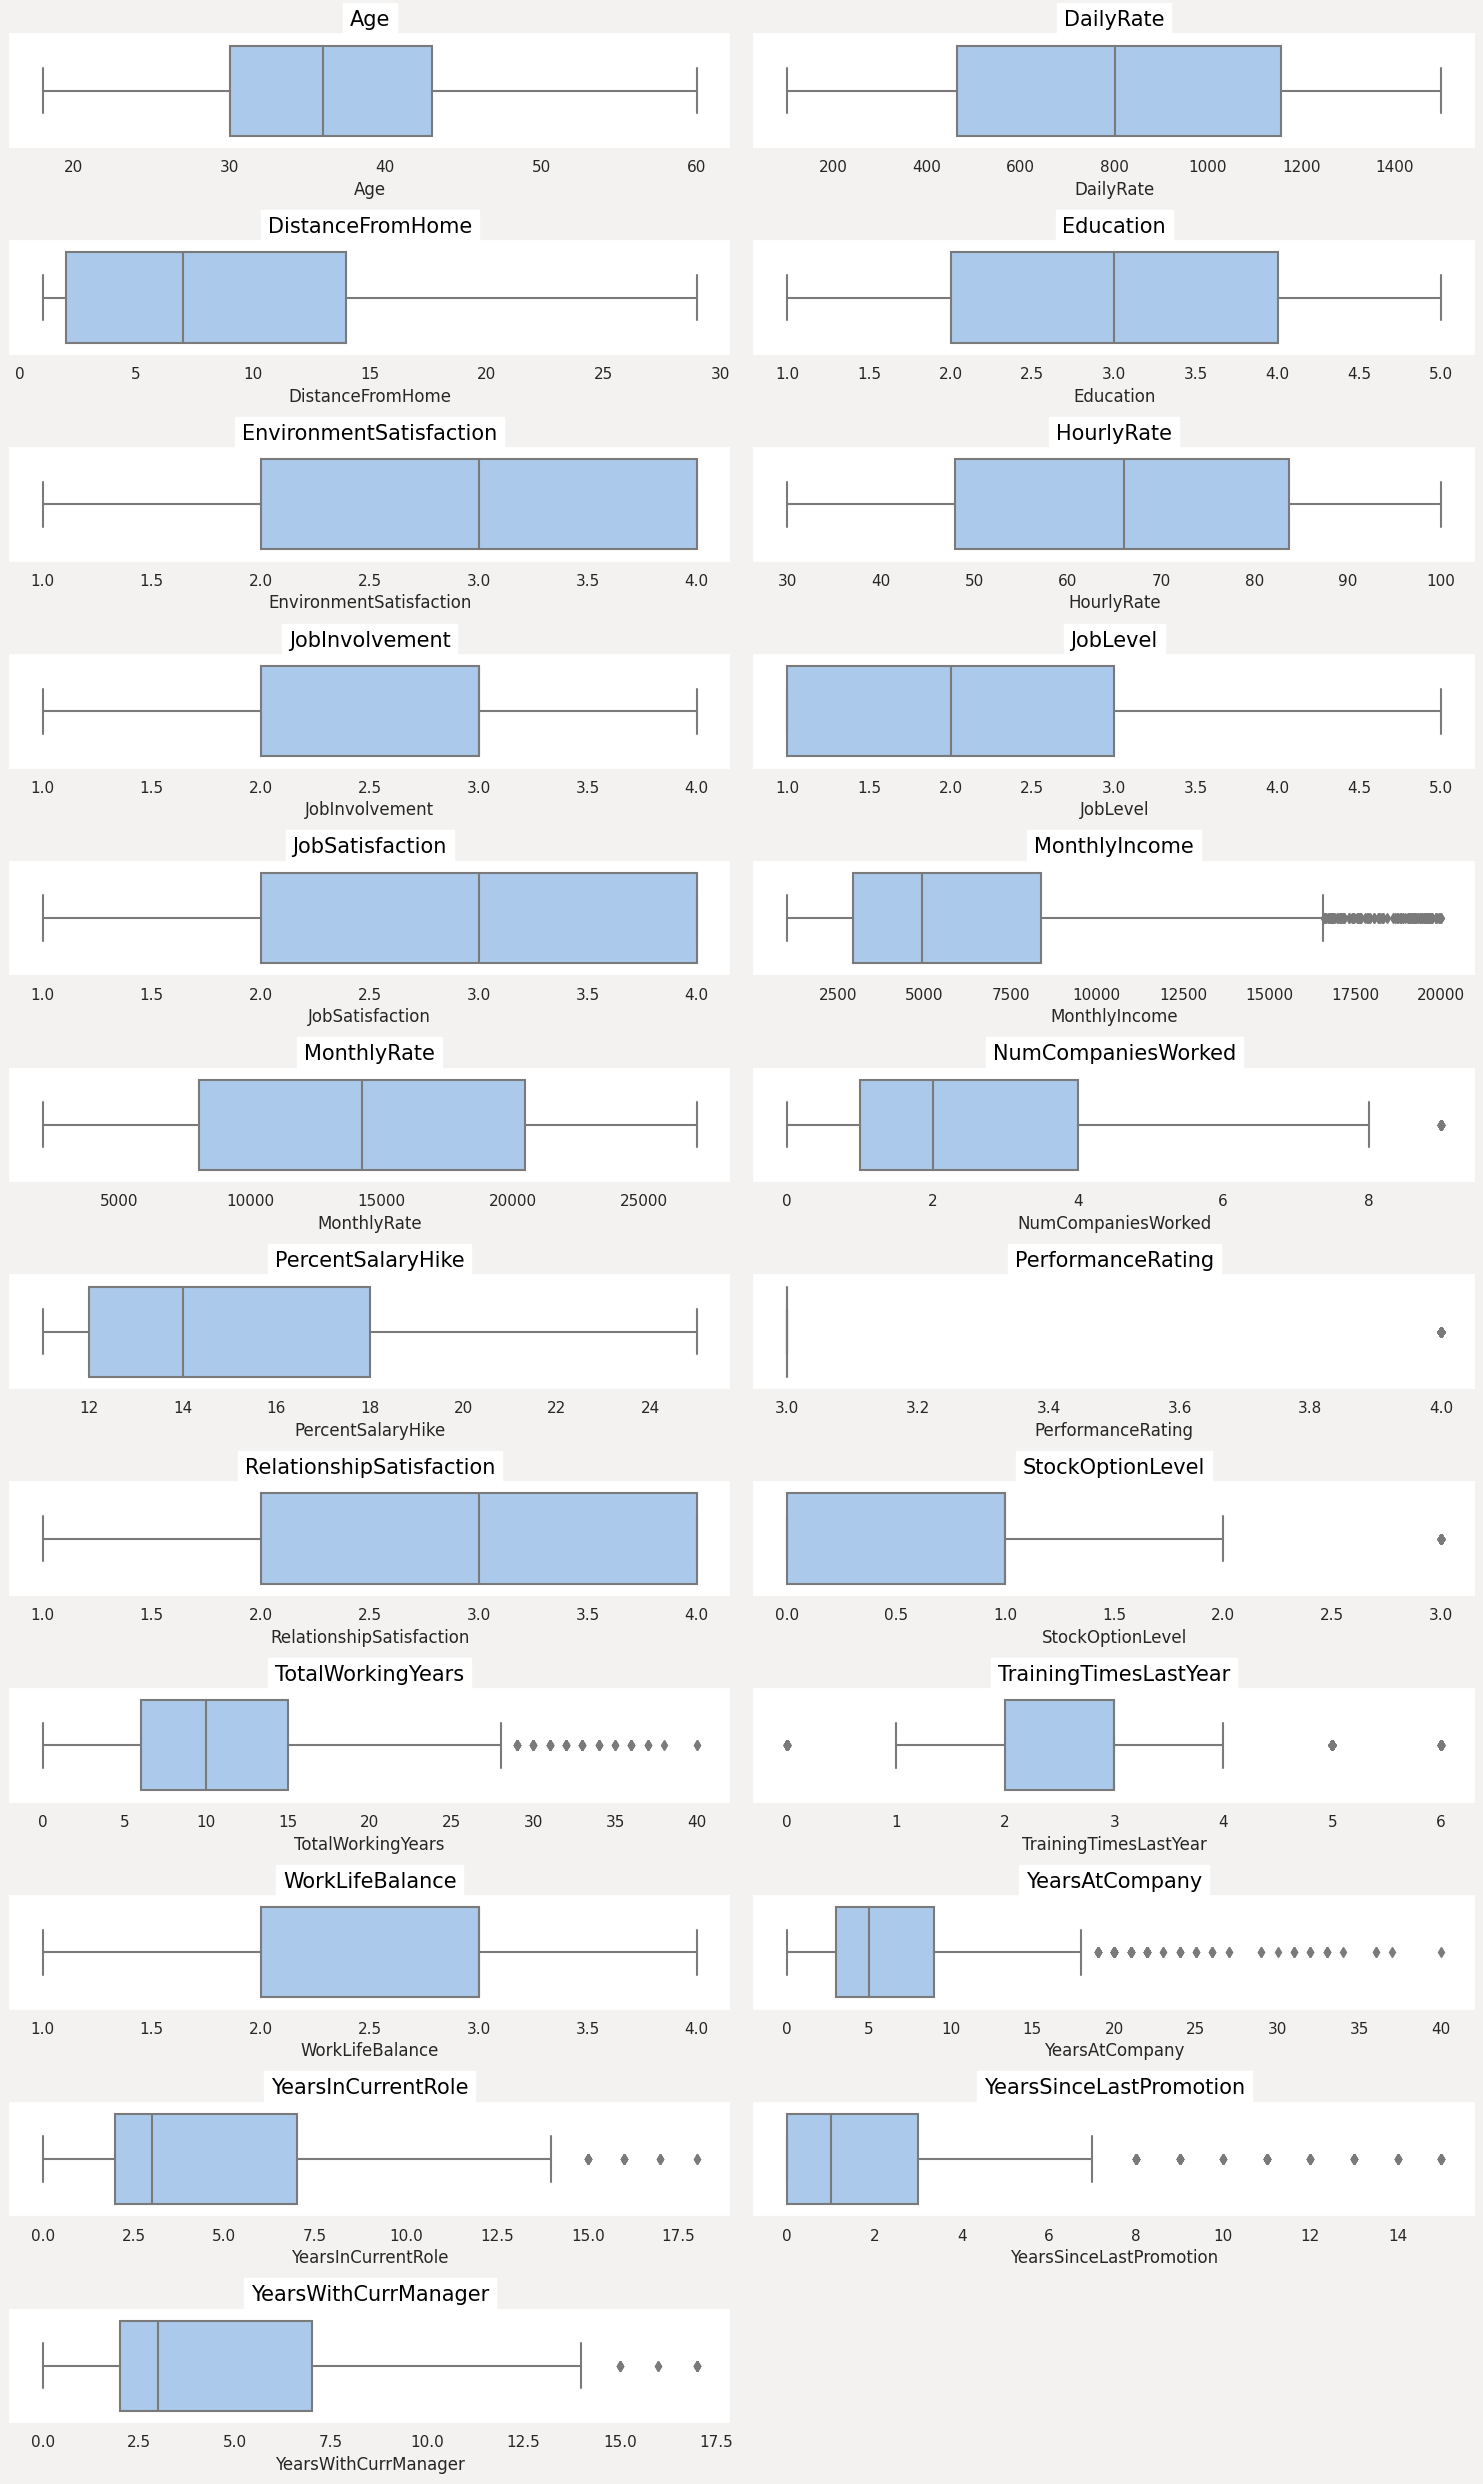

In [93]:
plt.figure(figsize = (15,25))
for idx, i in enumerate(num):
    plt.subplot(12, 2, idx + 1)
    sns.boxplot(x = i, data = df)
    plt.title(i,backgroundcolor='white',color='black',fontsize=15)
    plt.xlabel(i, size = 12)
plt.tight_layout()
plt.show()

In [87]:
import plotly.express as px

def plot_attrition_rates(df, attribute):
    # Grouping by Gender, specified attribute, and Attrition; calculating normalized counts
    plot_df = df.groupby(['Gender', attribute])['Attrition'].value_counts(normalize=True)

    # Multiplying by 100, renaming columns, and resetting index
    plot_df = plot_df.mul(100).rename('Percent').reset_index()

    # Creating the bar plot using plotly express
    fig = px.bar(plot_df, x=attribute, y="Percent", color="Attrition", barmode="group",
                 text='Percent', opacity=.75, facet_col="Gender",
                 category_orders={'Attrition': ['Yes', 'No']},
                 color_discrete_map={'Yes': '#C02B34', 'No': '#CDBBA7'})

    # Updating trace properties
    fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside',
                      marker_line=dict(width=1, color='#28221D'), width=.4)

    # Updating layout properties
    fig.update_layout(title_text=f'Attrition Rates by {attribute} and Gender', yaxis_ticksuffix='%',
                      paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', font_color='#28221D',
                      height=500, xaxis=dict(tickangle=30))

    # Updating x-axis properties for better readability
    fig.update_xaxes(showticklabels=True, tickangle=30, col=2)

    # Updating y-axis properties
    fig.update_yaxes(title="", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')

    # Displaying the plot
    fig.show()


plot_attrition_rates(df, 'Department')



Women in Human Resources experienced the highest amount of turnover, with nearly 1 out of every 3 women in HR leaving the company. For men, the highest turnover occurred in the Sales department.

In [88]:
plot_attrition_rates(df, 'Age')

The youth in a range from 18 to 22 for both genders are in higher probability of attrition then other age groups.

In [89]:
plot_attrition_rates(df, 'MaritalStatus')

Single individuals had higher frequency of departure from the organization compared to their married and divorced counterparts.

In [90]:
plot_attrition_rates(df, 'BusinessTravel')

Frequent travelers have higher attrition rate.

In [94]:
plot_attrition_rates(df, 'JobRole')

Among women, the roles with the highest attrition rates are Sales Representative and HR, while for men, Sales Representative and Laboratory Technicians experience notable turnover.

In [95]:
plot_attrition_rates(df, 'OverTime')

People who do overtime leave more often than those who don't.

In [101]:
plot_df = df.groupby(['Department', 'Attrition', 'Gender'])['MonthlyIncome'].median()
plot_df = plot_df.mul(12).rename('Salary').reset_index().sort_values('Salary', ascending=False).sort_values('Gender')
fig = px.bar(plot_df, x='Department', y='Salary', color='Gender', text='Salary',
             barmode='group', opacity=0.75, color_discrete_map={'Female': '#214D5C','Male': '#ACBCC2'},
             facet_col='Attrition', category_orders={'Attrition': ['Yes', 'No']})
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.update_layout(title_text='Median Salaries by Department and Attrition Status', font_color='#28221D',
                  yaxis=dict(title='Salary',tickprefix='$',range=(0,79900)),width=950,height=500,
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

In comparison to current employees, former employees had lower median salaries across all three departments. In Human Resources, women tend to have higher median salaries than men.

In [ ]:
plot_df = data.groupby('JobRole')['MonthlyIncome'].mean()
plot_df = plot_df.mul(12).rename('Salary').reset_index().sort_values('Salary', ascending=False)
fig = px.bar(plot_df, x='JobRole', y='Salary', text='Salary', opacity=0.7)
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'), marker_color='#3A5F53')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.update_layout(title_text='Average Salaries by Job Role', font_color='#28221D',
                  yaxis=dict(title='Salary',tickprefix='$'), height=500,
                  xaxis_title='', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show()

In [102]:
fig=make_subplots(rows=1, cols=2,
                  # subplot_titles=("", "Employee Attrition Statistics"),
                  specs=[[{"type": "bar"}, {"type": "pie"}]])

# Bar chart
plot_df = df['Attrition'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index().sort_values('Percent')
plot_df.rename(columns={'index': 'Attrition'}, inplace=True)
plot_df['Attrition'] = ['Former Employees' if i == 'Yes' else 'Current Employees' for i in plot_df['Attrition']]
x = plot_df['Attrition']
y = plot_df['Percent']
fig.add_trace(
    go.Bar(x=x, y=y, text=y, opacity=.8,
           hovertemplate='Employee Attrition Rate<br>%{x}: %{y:.3}%<extra></extra>',
           showlegend=False), row=1, col=1)
fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside',
                  marker_line=dict(width=1, color='#1F0202'), marker_color=['#C02B34', '#CDBBA7'])
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='gray')

# Update layout to center the title
fig.update_layout(
    yaxis_ticksuffix='%',
    title_text='Employee Attrition Statistics',  # Set the desired title
    title_x=0.5,  # Center the title horizontally
)




Overall, around 16% of employees left the company.

According to industry benchmarks, the healthy attrition rate ranges between 10%-15% nationally. A steady rate of employee turnover suggests a well-functioning organization with a balanced hiring and termination process.

**Machine learning**

Data Cleaning and Preprocessing

There are several columns in the data that have numeric values that represent categories, like Education that has values of 1 through 5 representing different levels of education. These columns were converted to categorical variables to perform significance testing for feature selection. Lastly, to reduce the skewness in the data, I log-transformed variables that had a skewness above 0.75.

In [64]:
cat_cols=[]
for i in df.columns:
    if data[i].nunique() <= 5 or data[i].dtype == object:
        cat_cols.append(i)
df=data.copy()
df.drop(df[cat_cols], axis=1, inplace=True)
df.drop('EmployeeNumber', axis=1, inplace=True)
corr=df.corr().round(2)
x=corr.index.tolist()
y=corr.columns.tolist()
z=corr.to_numpy()
fig = ff.create_annotated_heatmap(z=z, x=x, y=y, annotation_text=z, name='',
                                  hovertemplate="Correlation between %{x} and %{y}= %{z}",
                                  colorscale='GnBu')
fig.update_yaxes(autorange="reversed")
fig.update_layout(title="Correlation Matrix of Employee Attrition",
                  font_color='#28221D',margin=dict(t=180),height=600)
fig.show()

NameError: name 'cat_cols' is not defined

In [ ]:
# Computing the correlation matrix
corr = num.corr().round(2)

# Creating annotated heatmap using plotly figure_factory
heatmap = ff.create_annotated_heatmap(z=corr.values,
                                      x=num_cols,
                                      y=num_cols,
                                      annotation_text=corr.values,
                                      colorscale='GnBu',
                                      hovertemplate="Correlation between %{x} and %{y}= %{z:.2f}")

# Creating the layout
layout = go.Layout(title="Correlation Matrix of Employee Attrition",
                   font_color='#28221D',
                   margin=dict(t=180),
                   height=600)

# Displaying the plot directly from the figure_factory result
heatmap.show()


In [ ]:
# Check for variables with skew above 0.75
df=df.copy()
skew_limit = 0.75
skew_vals = df.skew()
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

display(skew_cols.style.set_caption('Columns to be log-transformed:'))

# Log-transform skewed variables
for i in skew_cols.index.values:
    df[i] = df[i].apply(np.log1p)

,Skew


Hypothesis Testing

I. Independent T-Test
add Codeadd Markdown
To compare the average monthly income among current and former employees, I'll perform an independent t-test. This will allow us to determine whether there is a statistically significant difference between the average incomes of the two populations. To test this, I'll use the log-transformed data since one of the assumptions of the test is that the continuous variable is approximately normally distributed.

Hypothesis:
𝐻0
 : The null hypothesis for the t-test is that the average monthly income of former employees is the same as current employees.
𝑢1=𝑢2


𝐻1
 : The alternative hypothesis is that the average monthly income of former employees is different than current employees.
𝑢1≠𝑢2

In [ ]:
!pip install researchpy

In [ ]:
import researchpy as rp
summary, res=rp.ttest(group1=df['MonthlyIncome'][df['Attrition']=='Yes'],
                      group2=df['MonthlyIncome'][df['Attrition']=='No'],
                      group1_name='Former Employees', group2_name='Current Employees')
print("\nSummary Statistics:")
display(summary)
display(res)

KeyError: 'Attrition'